## Importing Libraries and Loading Data

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
#Checking for null values again
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#We can see there are no null values in any columns and data is already clean
#Also the Datatypes for all columns looks good except for 'dteday', hence changing the dataype
from datetime import datetime
df['dteday'] = df['dteday'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))

In [7]:
#Deriving 'day' from 'dteday' and dropping the Orginal column as we already have year and month for this date in other columns
df['day'] = df['dteday'].dt.day

df = df.drop(['dteday'],axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [8]:
#Getting summary for numeric columns in the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000


## Reading and Understanding Data

In [9]:
#Creating 2 sample dataframes to get check relation of each column with the column 'cnt' using pairplots
subdf1 = df[['cnt', 'registered','casual','windspeed','hum','atemp','temp','weathersit']]
subdf2 = df[['cnt','yr','mnth','day','holiday','weekday','workingday','season']]

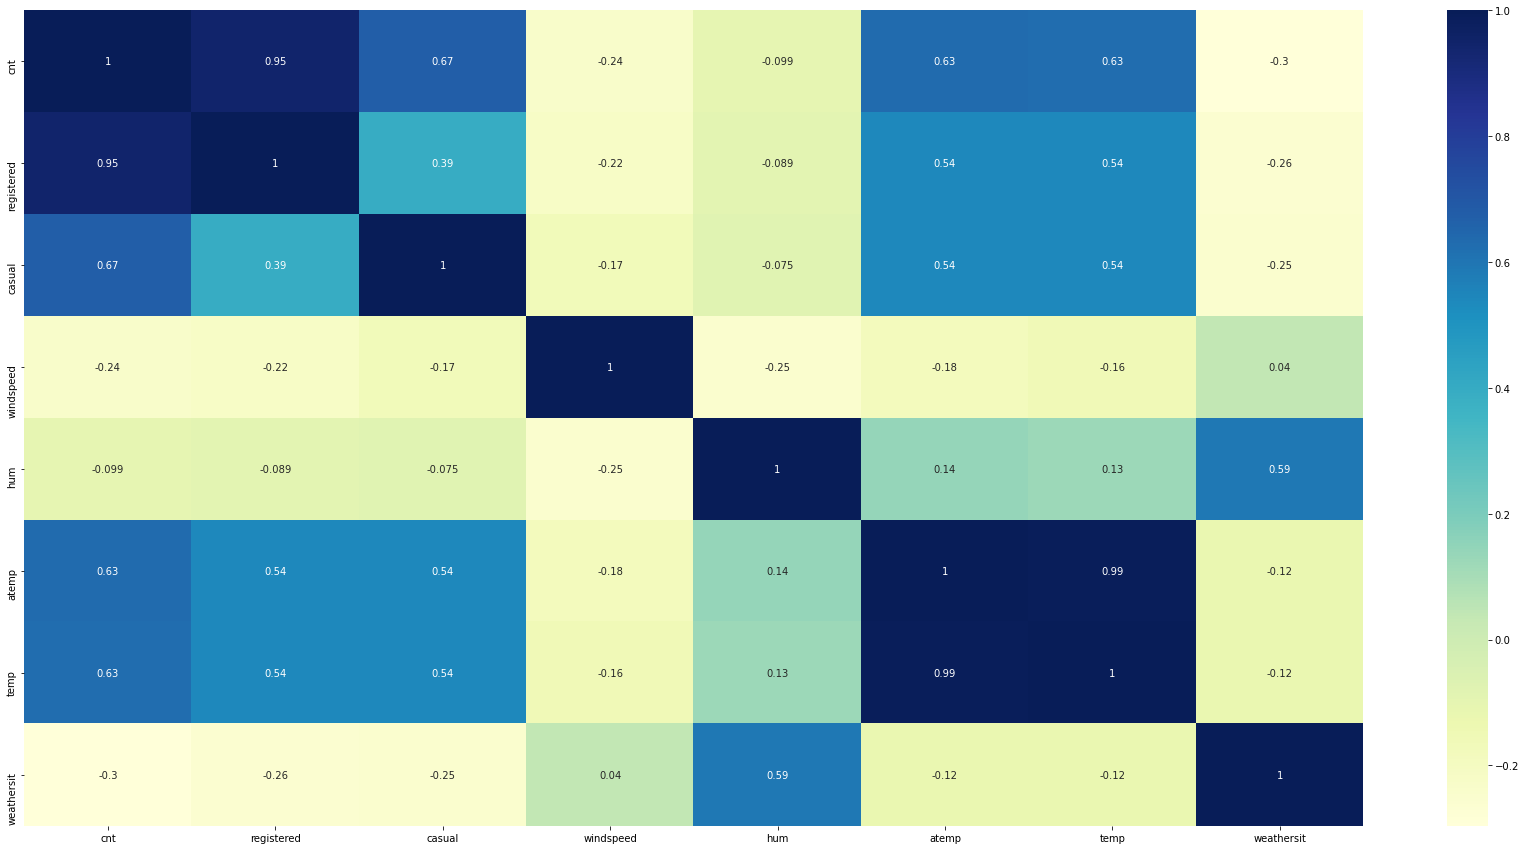

In [10]:
#Heatmap to find correlation of each variable with 'cnt'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf1.corr(), annot = True, cmap="YlGnBu")
plt.show()

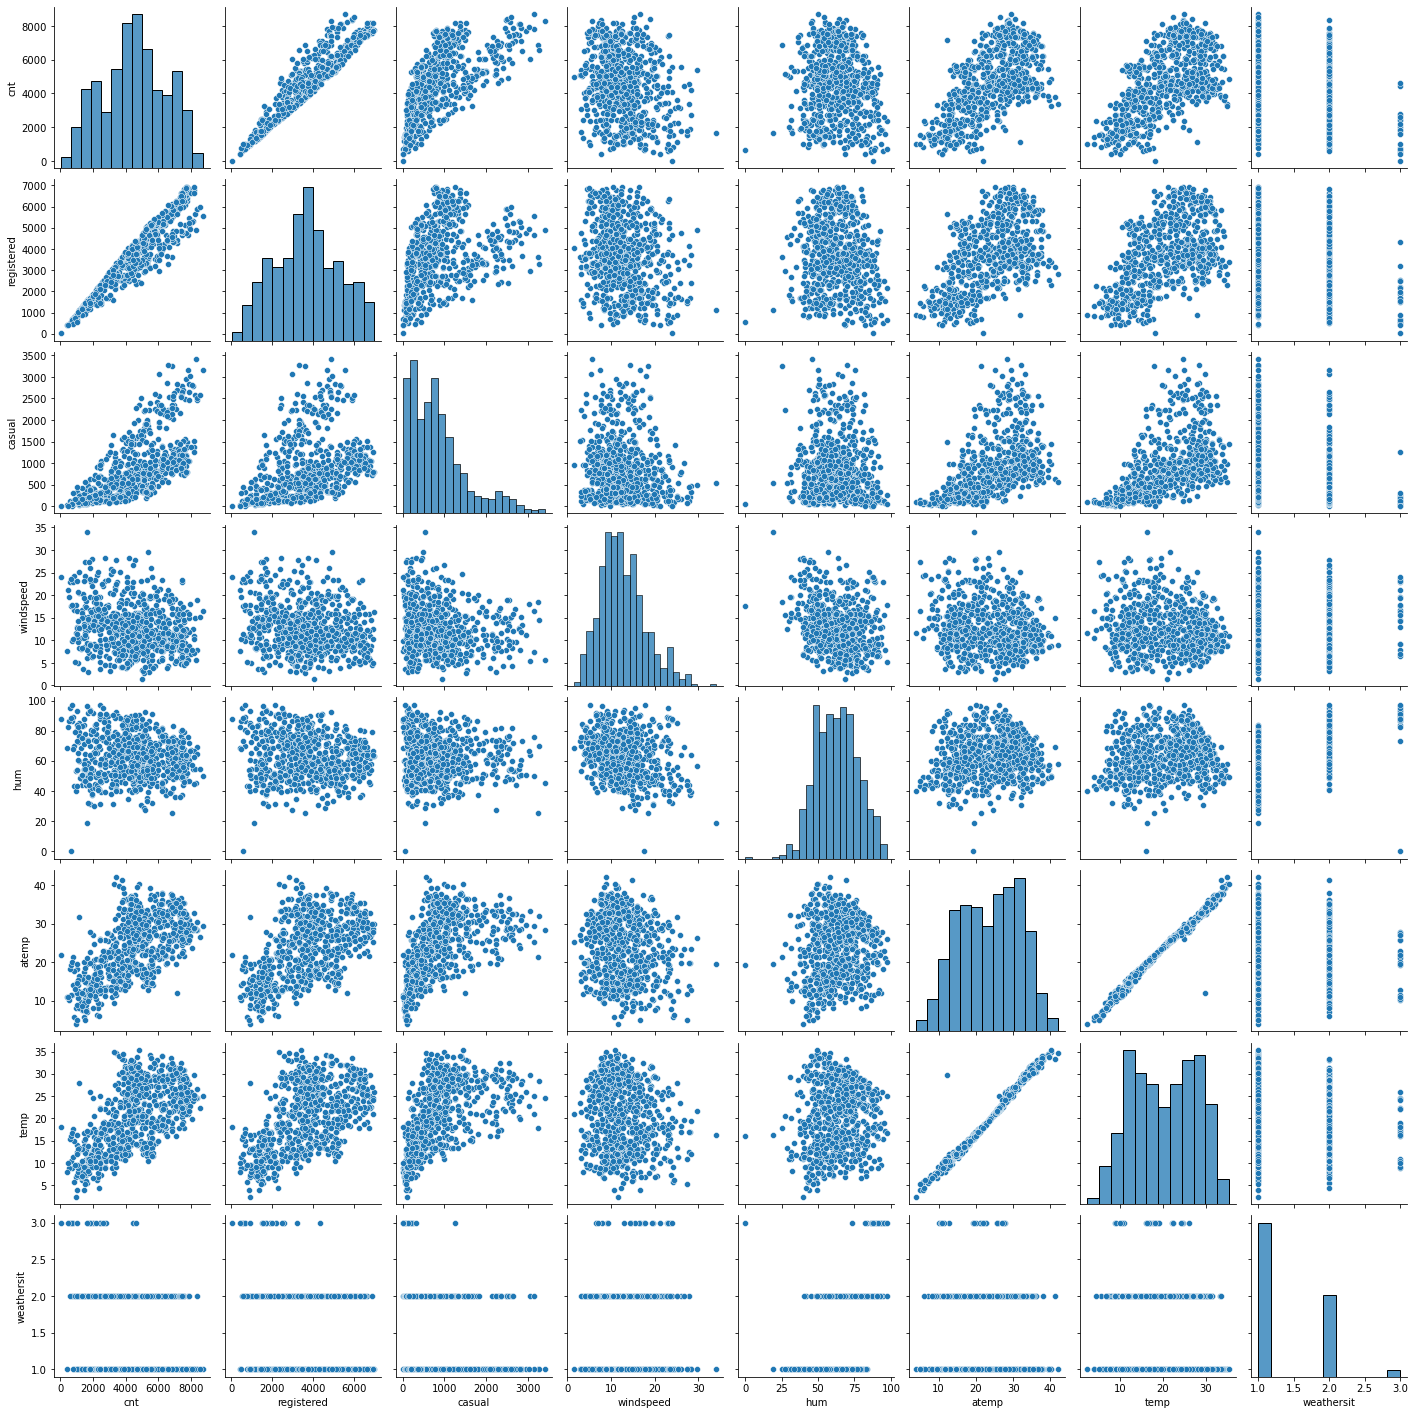

In [11]:
#Analzying relationship between variables using 2 sub-parts of the data frame
sns.pairplot(subdf1)
plt.show()

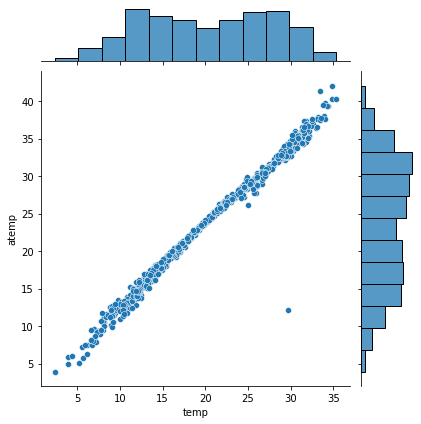

In [12]:
#As we can see from the above pairplot that there is a linear relationship between 'temp' and 'atemp' 
#To understand more we plot them separately and see that their distribution also looks similar
sns.jointplot(df['temp'],df['atemp'])
plt.show()

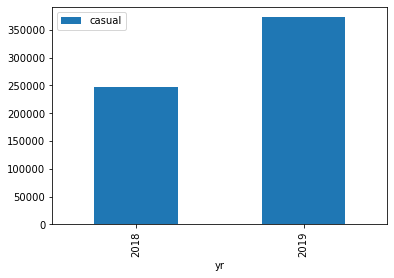

In [13]:
#From the barplot, we can see that the demand is increasing yearly for Casual users
fig, ax = plt.subplots()
df.groupby(['yr'])['casual'].sum().plot.bar()
ax.set_xticklabels(('2018', '2019'))
plt.legend()
plt.show()

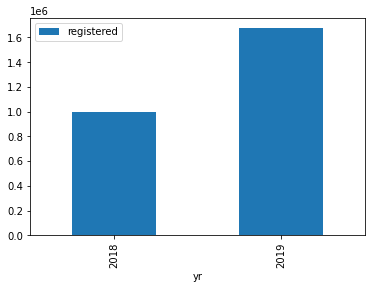

In [14]:
#From the barplot, we can see that the demand is increasing yearly for Registered users
fig, ax = plt.subplots()
df.groupby(['yr'])['registered'].sum().plot.bar()
ax.set_xticklabels(('2018', '2019'))
plt.legend()
plt.show()

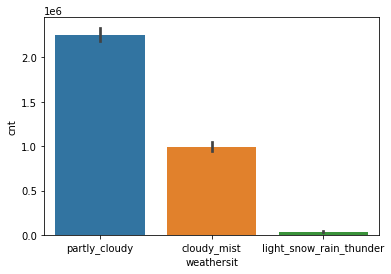

In [15]:
#Barplot showing count of users was more when the weather condition was partly_cloudy 
#We are giving only 3 labels here as we dont have data for weathersit = 4 (high_snow_rain_thunder)

fig, ax = plt.subplots()
sns.barplot(x='weathersit', y='cnt', data=df, estimator=sum)
ax.set_xticklabels(('partly_cloudy', 'cloudy_mist','light_snow_rain_thunder'))
plt.show()

In [16]:
#Dropping one of the columns from 'temp' and 'atemp' to avoid redundancy
#Also dropping 'instant' as it does not help in the analysis
df = df.drop(['atemp','instant'],axis=1)

In [17]:
#Next we can see that casual and registered are linearly related to 'cnt'
#But we know that 'cnt' is the total count of 'casual' and 'registered' added together, hence dropping these as well.
df = df.drop(['casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


From the above plots, we can conclude that:
- The variables 'casual' and 'registered' together make up 'cnt', hence we will have to drop these.
- The variable 'temp' and 'atemp' are almost similar and can create redundacy, so we drop 1 variable from these.
- The variable 'temp' has a linear relationship with target variable 'cnt', which can be significant for modelling.
- The demand for bikes increases yearly for both Registered and Casual Users and thus for the total count 'cnt' as well.
- The demand for bikes is more for a weather situation, when 'weathersit' is partly_cloudy ('cnt' increases for 'weathersit'=1)

These findings will help us decide which variables are significant and should be considered while building our model.

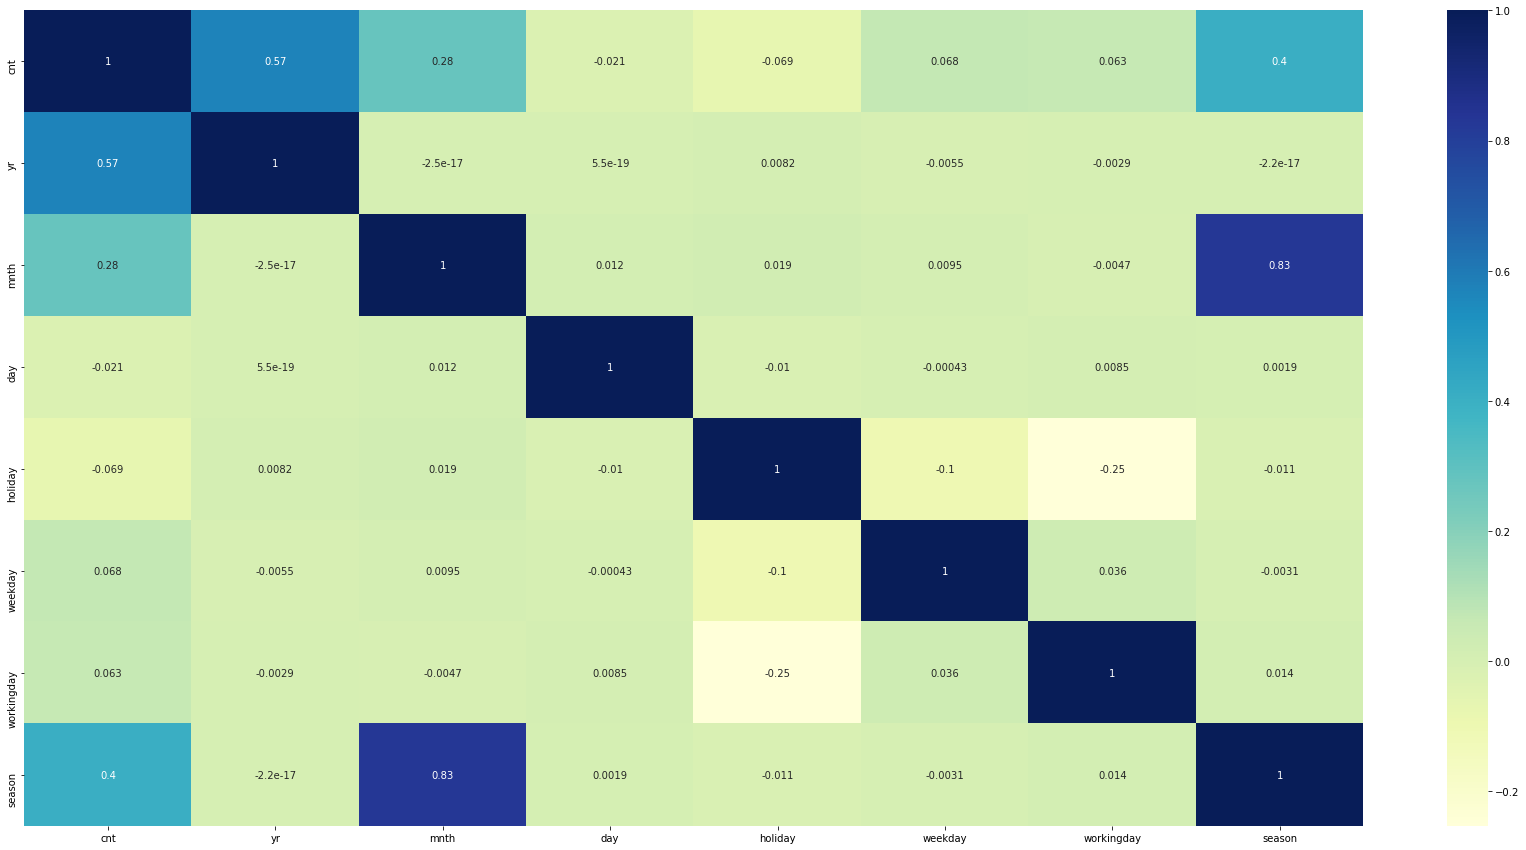

In [18]:
#Heatmap to find correlation of each variable with 'cnt'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf2.corr(), annot = True, cmap="YlGnBu")
plt.show()

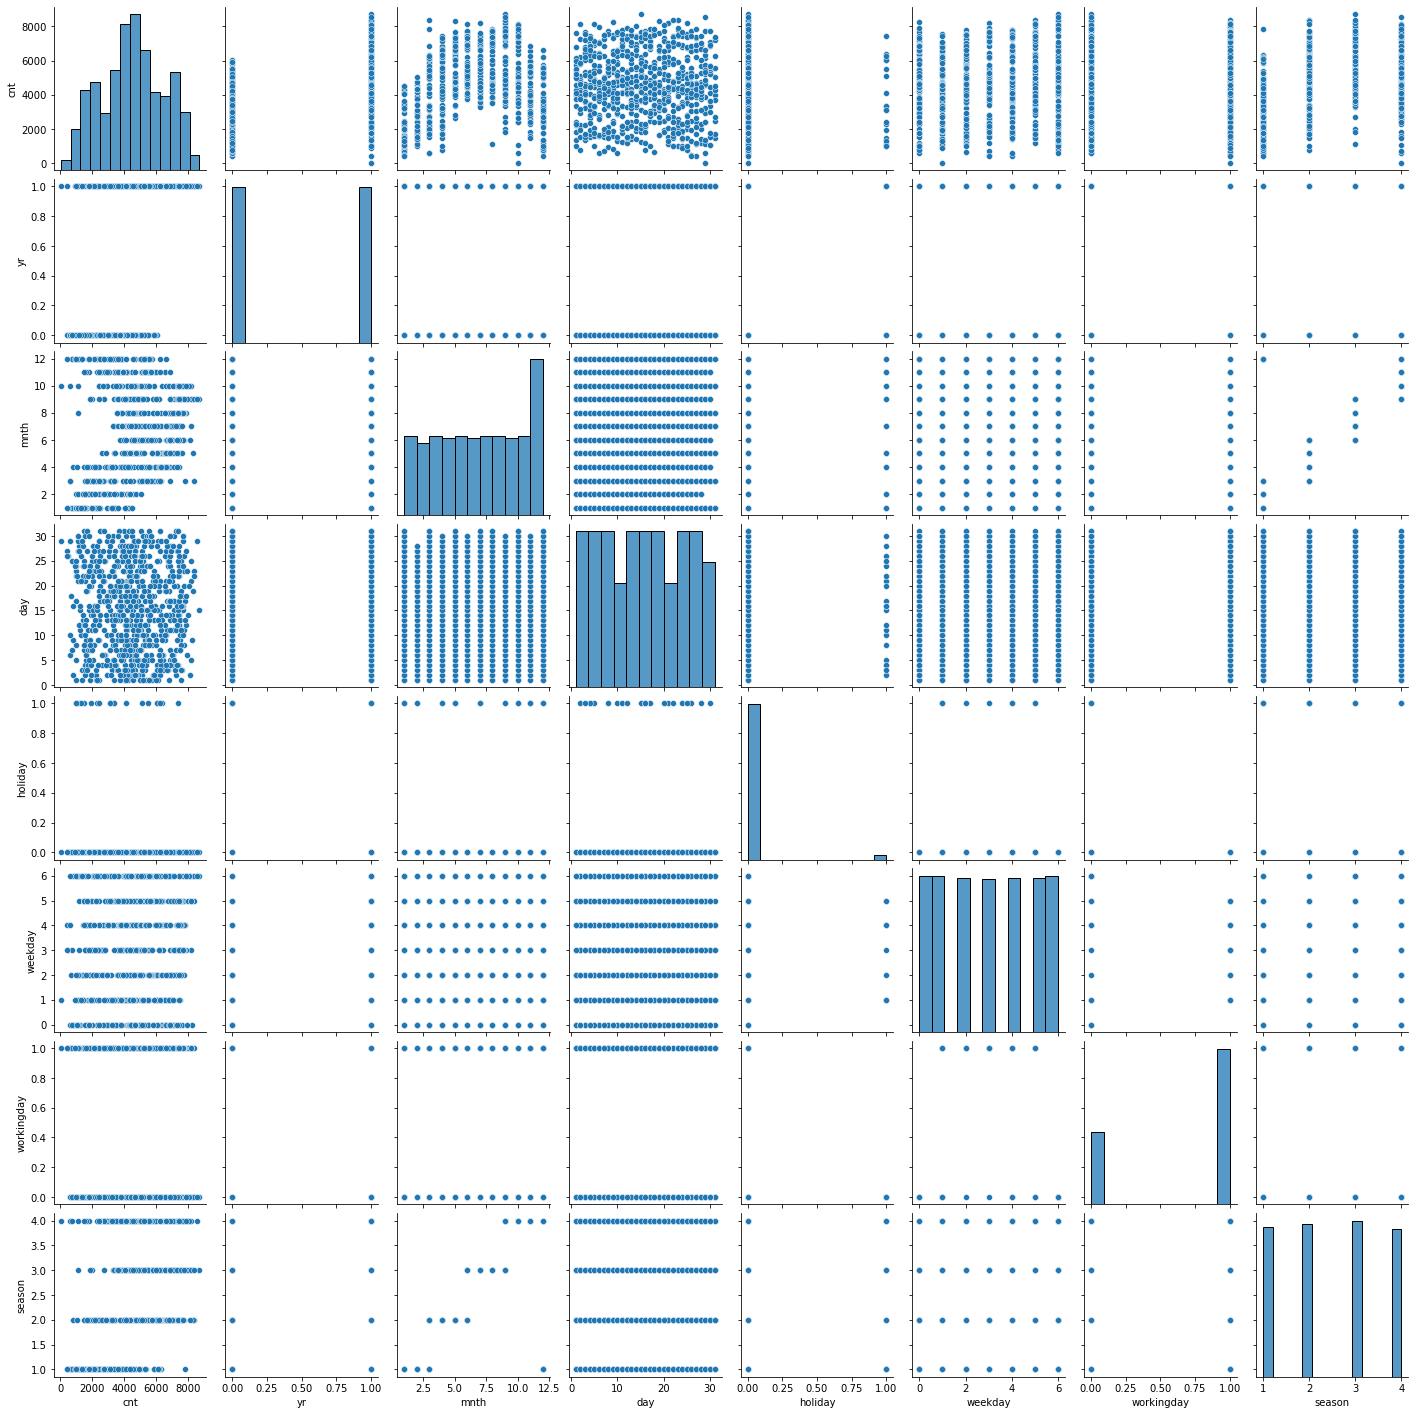

In [19]:
#Plotting and analysing the next set of variables
sns.pairplot(subdf2)
plt.show()

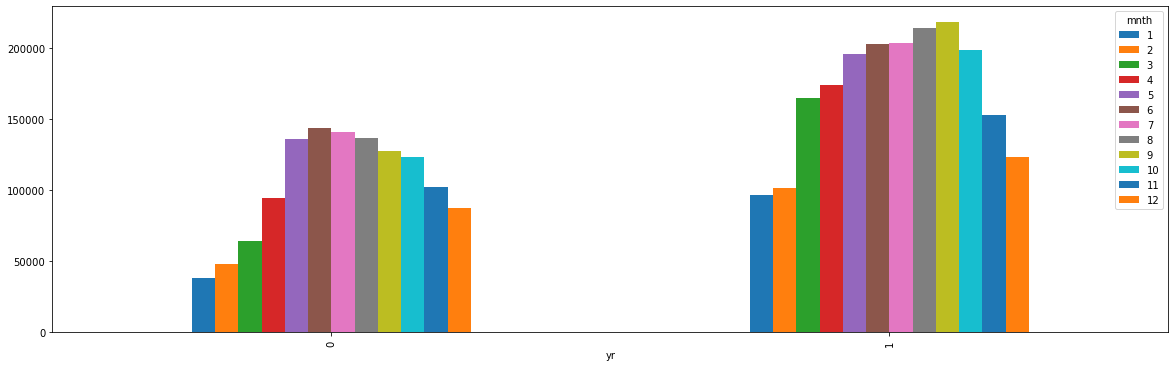

In [20]:
#Plotting a graph to show the year-wise and month-wise impact on 'cnt'
data = pd.pivot_table(data=df,values='cnt',index='yr',columns='mnth',aggfunc=sum)
data.plot(kind='bar',stacked=False,figsize=[20,6])
plt.show()

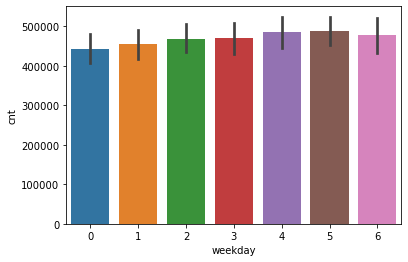

In [21]:
#Overview of only Weekdays doesn't show much trend.
sns.barplot(x='weekday', y='cnt', data=df, estimator=sum)
plt.show()

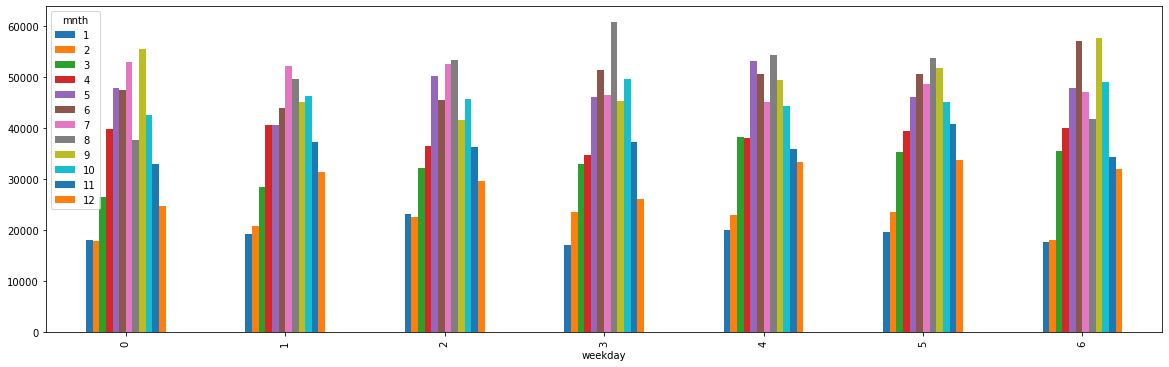

In [22]:
#But weekdays across a month show different variances.
data = pd.pivot_table(data=df,values='cnt',index='weekday',columns='mnth',aggfunc=sum)
data.plot(kind='bar',stacked=False,figsize=[20,6])
plt.show()

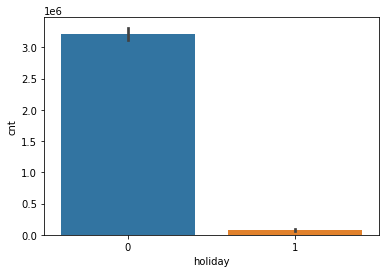

In [23]:
#Demand for bikes is less on a holiday
sns.barplot(x='holiday', y='cnt', data=df, estimator=sum)
plt.show()

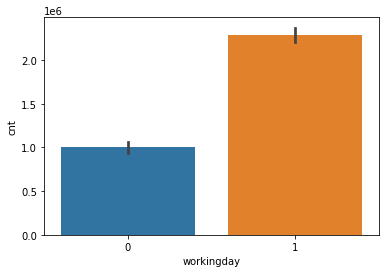

In [24]:
#Demand for bikes is more on a workingday
sns.barplot(x='workingday', y='cnt', data=df, estimator=sum)
plt.show()

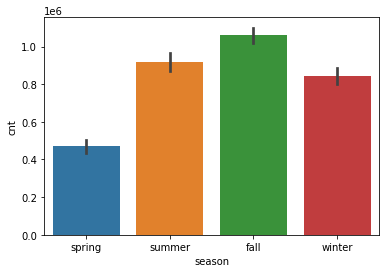

In [25]:
#The seasons fall and summer show the highest demands, followed by winter.
fig, ax = plt.subplots()
sns.barplot(x='season', y='cnt', data=df, estimator=sum)
ax.set_xticklabels(('spring', 'summer','fall','winter'))
plt.show()

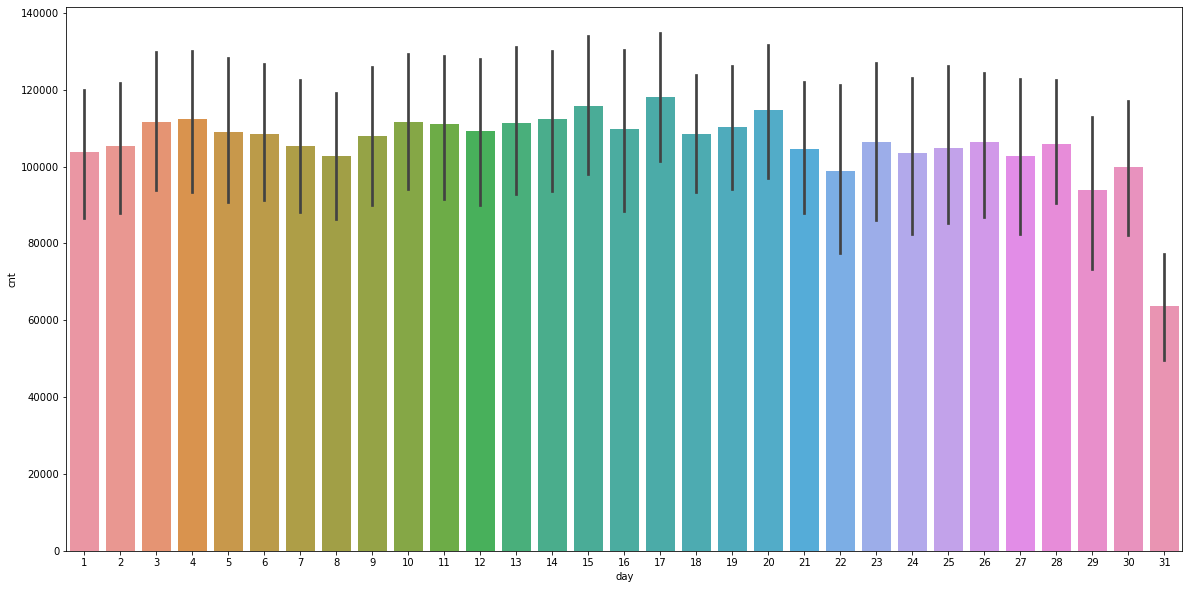

In [26]:
#Day variable doesn't show much trend but it might be effective when combined with some other variable.
plt.figure(figsize=(20,10))
sns.barplot(x='day', y='cnt', data=df, estimator=sum)
plt.show()

From the above plots, we can conclude that:
- In both years, the demand was less during the start and end of the year. During the mid-year the demand increased. 
- It was highest for the months September, August, July, June, October, May for the year 2019. 
- And it was highest for the months June, July, August, May, September, October for the year 2018. Which says that 6 months experienced highest demands and might be signifcant for analysis.
- Variable weekday might not be showing much prediction, but weekdays across a month show different variances. 
- Variable holiday can be a strong predictor as demand for bikes is less on a holiday.
- Demand for bikes is more on a workingday.
- The seasons fall and summer show the highest demands, followed by winter.
- Day variable doesn't show much trend here.

These findings will help us decide which variables are significant and should be considered while building our model.

## Categorical Mapping of Data

In [27]:
#Mapping each numeric value to its coressponding value as shown in data dictionary
#For weekdays we are considering '0' as 'sunday' & '6' as 'saturday' and so on, based on workingday fields given as '0'

df['season'] = df[['season']].apply(lambda x: x.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' }))
df['mnth'] = df[['mnth']].apply(lambda x: x.map({1 : 'january', 2 : 'february', 3 : 'march', 4 : 'april', 
                                                     5 : 'may', 6 : 'june', 7 : 'july', 8 : 'august', 
                                                     9 : 'september', 10 : 'october', 11 : 'november', 12 : 'december' }))
df['weekday'] = df[['weekday']].apply(lambda x: x.map({0 : 'sunday', 1 : 'monday', 2 : 'tuesday', 3 : 'wednesday', 
                                                     4 : 'thursday', 5 : 'friday', 6 : 'saturday' }))
df['weathersit'] = df[['weathersit']].apply(lambda x: x.map({1 : 'partly_cloudy', 2 : 'cloudy_mist',
                                                             3 : 'light_snow_rain_thunder', 4 : 'heavy_snow_rain_thunder' }))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,january,0,saturday,0,cloudy_mist,14.110847,80.5833,10.749882,985,1
1,spring,0,january,0,sunday,0,cloudy_mist,14.902598,69.6087,16.652113,801,2
2,spring,0,january,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349,3
3,spring,0,january,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562,4
4,spring,0,january,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600,5


## Creating Dummy Variables

In [28]:
#Using the 'set_option' function to display the maximum number of columns
pd.set_option('display.max_columns', 100)

In [29]:
#Creating dummy variables for variable 'season'
status1 = pd.get_dummies(df['season'], drop_first=True)
df = pd.concat([df, status1], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter
0,spring,0,january,0,saturday,0,cloudy_mist,14.110847,80.5833,10.749882,985,1,1,0,0
1,spring,0,january,0,sunday,0,cloudy_mist,14.902598,69.6087,16.652113,801,2,1,0,0
2,spring,0,january,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349,3,1,0,0
3,spring,0,january,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562,4,1,0,0
4,spring,0,january,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600,5,1,0,0


In [30]:
#Creating dummy variables for variable 'mnth'
status2 = pd.get_dummies(df['mnth'], drop_first=True)
df = pd.concat([df, status2], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september
0,spring,0,january,0,saturday,0,cloudy_mist,14.110847,80.5833,10.749882,985,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,january,0,sunday,0,cloudy_mist,14.902598,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,january,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,january,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
#Creating dummy variables for variable 'weekday'
status3 = pd.get_dummies(df['weekday'], drop_first=True)
df = pd.concat([df, status3], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,0,january,0,saturday,0,cloudy_mist,14.110847,80.5833,10.749882,985,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,january,0,sunday,0,cloudy_mist,14.902598,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,january,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,0,january,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,january,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
#Creating dummy variables for variable 'weathersit'
status4 = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, status4], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
0,spring,0,january,0,saturday,0,cloudy_mist,14.110847,80.5833,10.749882,985,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,spring,0,january,0,sunday,0,cloudy_mist,14.902598,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,spring,0,january,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,spring,0,january,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,spring,0,january,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [33]:
#Dropping variables whose value dummies have been created
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   hum                      730 non-null    float64
 5   windspeed                730 non-null    float64
 6   cnt                      730 non-null    int64  
 7   day                      730 non-null    int64  
 8   spring                   730 non-null    uint8  
 9   summer                   730 non-null    uint8  
 10  winter                   730 non-null    uint8  
 11  august                   730 non-null    uint8  
 12  december                 730 non-null    uint8  
 13  february                 730 non-null    uint8  
 14  january                  7

In [35]:
#Plotting 2 heatmaps to understand relation between the target and each independent variable.
subdf1 = df[['cnt','yr','day','holiday','workingday','temp','hum','windspeed','spring','summer','winter',
              'monday','saturday','sunday','thursday','tuesday','wednesday']]
subdf2 = df[['cnt', 'august','december','february','july','june','march','may','november','october',
              'september','light_snow_rain_thunder','partly_cloudy']]

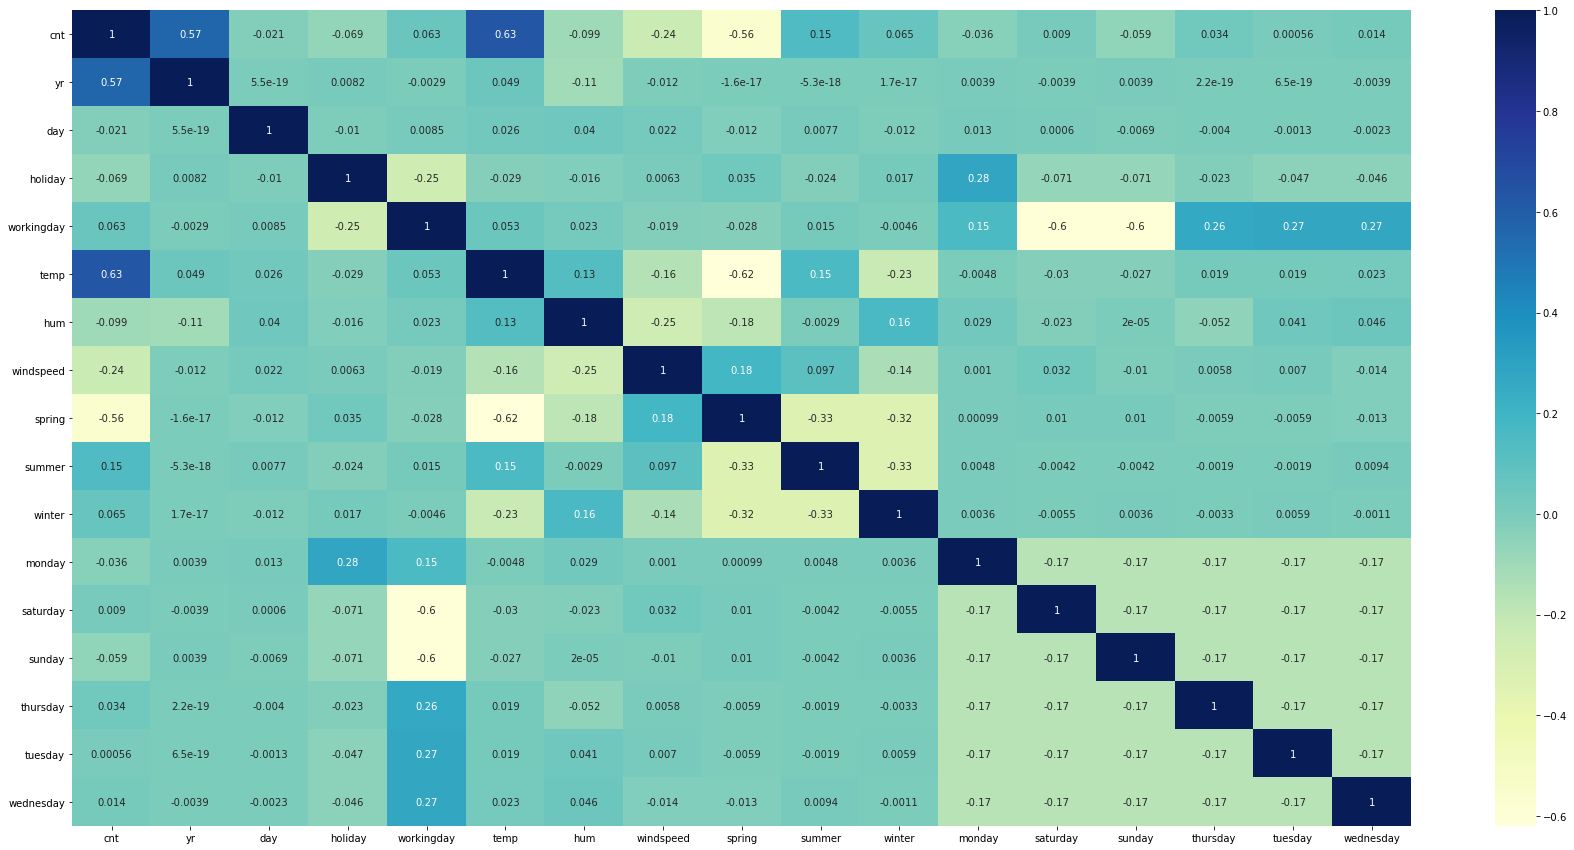

In [36]:
#Heatmap to find correlation of each variable with 'cnt'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf1.corr(), annot = True, cmap="YlGnBu")
plt.show()

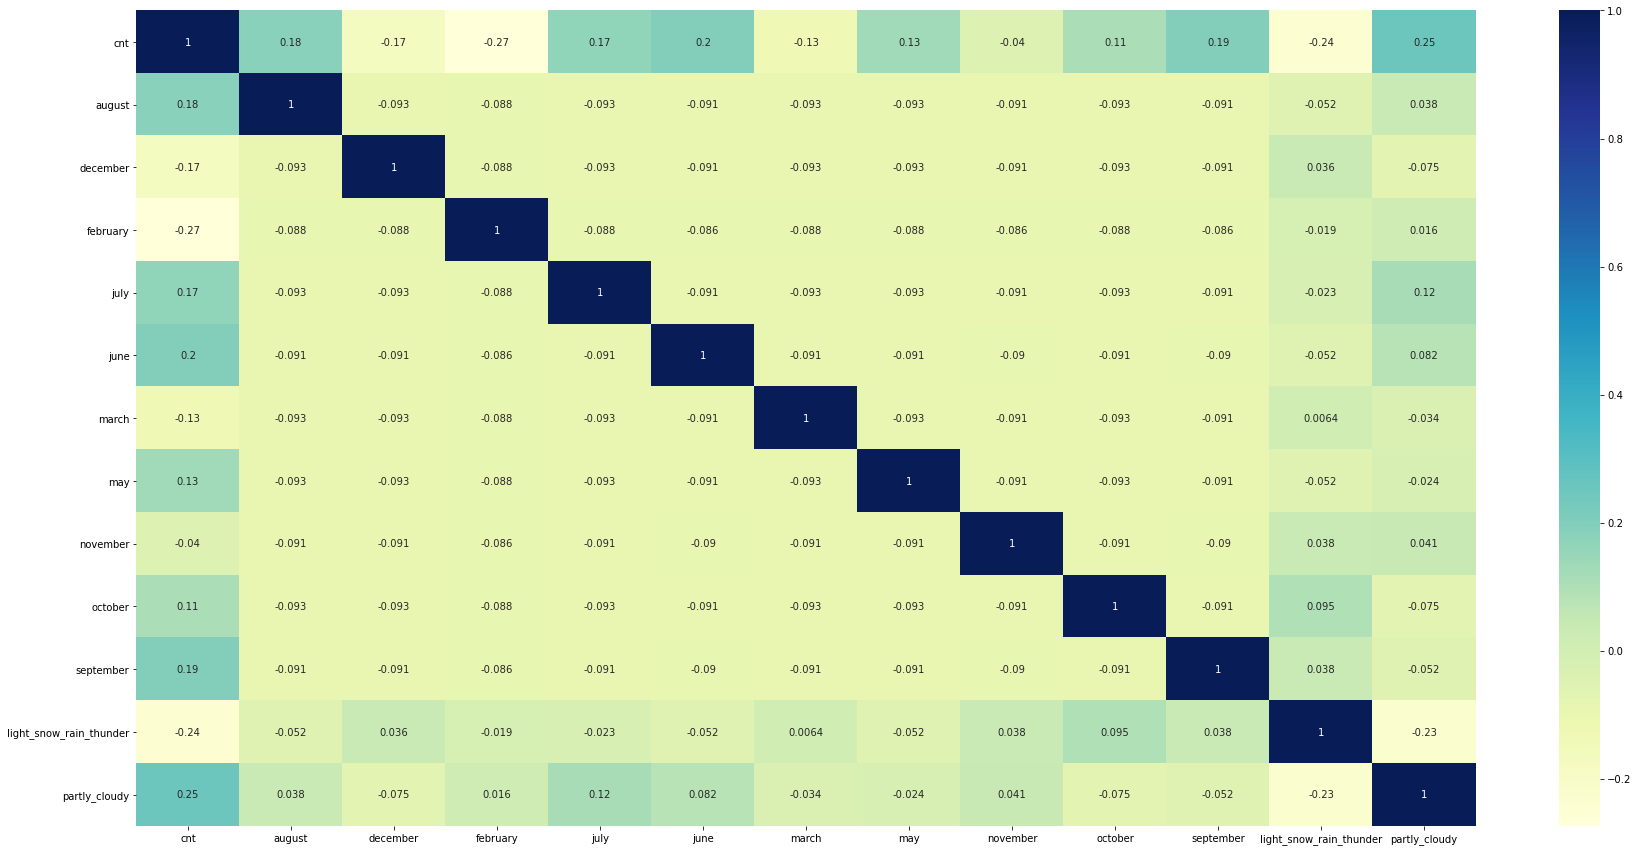

In [37]:
#Heatmap to find correlation of each variable with 'cnt'
plt.figure(figsize = (30, 15))
sns.heatmap(subdf2.corr(), annot = True, cmap="YlGnBu")
plt.show()

After observing heatmaps for the newly created variables, we found the following variables to have good correlation with cnt:
- From 1st plot: temp, yr, spring, windspeed, summer
- From 2nd plot: february, partly_cloudy, light_snow_rain_thunder, june

## Creating Train and Test sets for the model

In [38]:
#Specifying random seed and state to get same data rows in train and test datasets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#Creating MinMaxScaler class object 
scaler = MinMaxScaler()

In [40]:
#Applying MinMax to all numeric variables except binary variables having values as 0 or 1
num_vars = ['cnt','windspeed','hum','temp','day']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.066667,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0.966667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.900000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
#Checking scaling of all variables, they should have min as 0 and max value as 1
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.487124,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.296648,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.233333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.733333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building Model using features from RFE

In [42]:
#Splitting the train dataframe to X_train and y_train 
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
#Running RFE to get some features for our model.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [44]:
#Listing all the columns chosen by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 13),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 7),
 ('december', False, 3),
 ('february', False, 4),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 5),
 ('november', False, 2),
 ('october', False, 10),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 6),
 ('thursday', False, 11),
 ('tuesday', False, 9),
 ('wednesday', False, 12),
 ('light_snow_rain_thunder', True, 1),
 ('partly_cloudy', True, 1)]

In [45]:
#Saving these columns to a variable
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'january', 'july', 'september', 'saturday',
       'light_snow_rain_thunder', 'partly_cloudy'],
      dtype='object')

In [46]:
#Saving even these columns to a variable
unused_col = X_train.columns[~rfe.support_]
unused_col

Index(['day', 'august', 'december', 'february', 'june', 'march', 'may',
       'november', 'october', 'monday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [47]:
#Taking columns returned by RFE method
X_train_rfe = X_train[col]

In [48]:
#Building model for these selected features
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.31e-191
Time:                        22:01:47   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1932      0.040      4.874      0.000       0.115       0.271
yr                          0.2305      0.008     28.807      0.000       0.215       0.246
holiday                    -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                  0.0435      0.012      3.781      0.000       0.021       0.066
temp                        0.5098      0.034     14.851      0.000       0.442       0.577
hum                        -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                  -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring                     -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                      0.0497      0.015      3.346      0.001       0.020       0.079
winter                      0.0944      0.017      5.479      0.000       0.061       0.128
january                    -0.0343      0.017     -1.980      0.048      -0.068      -0.000
july                       -0.0532      0.018     -2.947      0.003      -0.089      -0.018
september                   0.0812      0.016      4.934      0.000       0.049       0.114
saturday                    0.0537      0.014      3.707      0.000       0.025       0.082
light_snow_rain_thunder    -0.1910      0.025     -7.750      0.000      -0.239      -0.143
partly_cloudy               0.0578      0.010      5.574      0.000       0.037       0.078
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Finding VIF for all independent features
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.84
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
13,saturday,1.78
15,partly_cloudy,1.63
10,january,1.57


The p-values aregood for all features, hence we check the VIF value for features.
For the VIF too, all values are acceptable, except for feature spring which is slightly greater. So dropping this and checking if this impacts the significance of the model or not.

In [50]:
#The feature 'spring' has a slightly high VIF value. Hence we drop this and rebuild the model.
X_train_new = X_train_rfe.drop(["spring"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.24e-191
Time:                        22:01:55   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1447      0.035      4.186      0.000       0.077       0.213
yr                          0.2294      0.008     28.567      0.000       0.214       0.245
holiday                    -0.0600      0.027     -2.220      0.027      -0.113      -0.007
workingday                  0.0439      0.012      3.793      0.000       0.021       0.067
temp                        0.5677      0.025     22.572      0.000       0.518       0.617
hum                        -0.1643      0.037     -4.402      0.000      -0.238      -0.091
windspeed                  -0.1932      0.025     -7.597      0.000      -0.243      -0.143
summer                      0.0746      0.011      6.836      0.000       0.053       0.096
winter                      0.1266      0.011     11.208      0.000       0.104       0.149
january                    -0.0392      0.017     -2.261      0.024      -0.073      -0.005
july                       -0.0445      0.018     -2.503      0.013      -0.079      -0.010
september                   0.0926      0.016      5.836      0.000       0.061       0.124
saturday                    0.0540      0.015      3.709      0.000       0.025       0.083
light_snow_rain_thunder    -0.1890      0.025     -7.636      0.000      -0.238      -0.140
partly_cloudy               0.0556      0.010      5.355      0.000       0.035       0.076
==============================================================================
Omnibus:                       60.777   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.515
Skew:                          -0.658   Prob(JB):                     1.68e-29
Kurtosis:                       5.122   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.65
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,saturday,1.78
14,partly_cloudy,1.62
9,january,1.55
8,winter,1.53
10,july,1.43
7,summer,1.41


In [52]:
#Checking if the features not considered by RFE help improve the model or not
#we try and build a model adding these 1 at a time
unused_col

Index(['day', 'august', 'december', 'february', 'june', 'march', 'may',
       'november', 'october', 'monday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [53]:
#Adding feature 'day' and rebuilding the model
X_train_new['day'] = X_train['day']
X_train_new1 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_new1).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.60e-190
Time:                        22:01:58   Log-Likelihood:                 516.78
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1449      0.035      4.170      0.000       0.077       0.213
yr                          0.2294      0.008     28.538      0.000       0.214       0.245
holiday                    -0.0599      0.027     -2.217      0.027      -0.113      -0.007
workingday                  0.0439      0.012      3.789      0.000       0.021       0.067
temp                        0.5677      0.025     22.544      0.000       0.518       0.617
hum                        -0.1641      0.037     -4.385      0.000      -0.238      -0.091
windspeed                  -0.1931      0.025     -7.583      0.000      -0.243      -0.143
summer                      0.0746      0.011      6.830      0.000       0.053       0.096
winter                      0.1266      0.011     11.194      0.000       0.104       0.149
january                    -0.0391      0.017     -2.256      0.025      -0.073      -0.005
july                       -0.0445      0.018     -2.501      0.013      -0.080      -0.010
september                   0.0925      0.016      5.821      0.000       0.061       0.124
saturday                    0.0540      0.015      3.706      0.000       0.025       0.083
light_snow_rain_thunder    -0.1890      0.025     -7.626      0.000      -0.238      -0.140
partly_cloudy               0.0557      0.010      5.334      0.000       0.035       0.076
day                        -0.0010      0.013     -0.074      0.941      -0.027       0.025
==============================================================================
Omnibus:                       60.524   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.876
Skew:                          -0.656   Prob(JB):                     2.31e-29
Kurtosis:                       5.118   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.35
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,saturday,1.78
14,partly_cloudy,1.63
9,january,1.55
8,winter,1.53
10,july,1.43
7,summer,1.41


In [55]:
#The added feature 'day' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new1 = X_train_new1.drop(["day"], axis = 1)
X_train_new1['august'] = X_train['august']
X_train_new2 = sm.add_constant(X_train_new1)
lm4 = sm.OLS(y_train,X_train_new2).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.17e-191
Time:                        22:02:01   Log-Likelihood:                 519.04
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1470      0.034      4.264      0.000       0.079       0.215
yr                          0.2295      0.008     28.685      0.000       0.214       0.245
holiday                    -0.0582      0.027     -2.162      0.031      -0.111      -0.005
workingday                  0.0434      0.012      3.763      0.000       0.021       0.066
temp                        0.5325      0.030     17.661      0.000       0.473       0.592
hum                        -0.1619      0.037     -4.351      0.000      -0.235      -0.089
windspeed                  -0.1893      0.025     -7.448      0.000      -0.239      -0.139
summer                      0.0893      0.013      6.903      0.000       0.064       0.115
winter                      0.1352      0.012     11.286      0.000       0.112       0.159
january                    -0.0373      0.017     -2.159      0.031      -0.071      -0.003
july                       -0.0201      0.021     -0.950      0.343      -0.062       0.022
september                   0.1095      0.018      6.172      0.000       0.075       0.144
saturday                    0.0527      0.015      3.628      0.000       0.024       0.081
light_snow_rain_thunder    -0.1875      0.025     -7.599      0.000      -0.236      -0.139
partly_cloudy               0.0575      0.010      5.532      0.000       0.037       0.078
august                      0.0404      0.019      2.102      0.036       0.003       0.078
==============================================================================
Omnibus:                       61.391   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.883
Skew:                          -0.642   Prob(JB):                     9.41e-32
Kurtosis:                       5.252   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.73
4,temp,2.99
15,august,2.07
10,july,2.05
7,summer,2.00
5,hum,1.90
3,workingday,1.88
12,saturday,1.78
8,winter,1.73
14,partly_cloudy,1.63


In [57]:
#The added feature 'august' added slightly to the significance but increased p-value for feature 'july'
#Hence we drop 'july' and add another feature
X_train_new2 = X_train_new2.drop(["july"], axis = 1)
X_train_new2['december'] = X_train['december']
X_train_new3 = sm.add_constant(X_train_new2)
lm5 = sm.OLS(y_train,X_train_new3).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.78e-191
Time:                        22:02:03   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1521      0.035      4.400      0.000       0.084       0.220
yr                          0.2299      0.008     28.800      0.000       0.214       0.246
holiday                    -0.0578      0.027     -2.153      0.032      -0.111      -0.005
workingday                  0.0441      0.012      3.833      0.000       0.022       0.067
temp                        0.5051      0.025     19.959      0.000       0.455       0.555
hum                        -0.1532      0.037     -4.121      0.000      -0.226      -0.080
windspeed                  -0.1905      0.025     -7.501      0.000      -0.240      -0.141
summer                      0.0934      0.011      8.327      0.000       0.071       0.115
winter                      0.1403      0.011     12.210      0.000       0.118       0.163
january                    -0.0432      0.018     -2.437      0.015      -0.078      -0.008
september                   0.1148      0.016      7.165      0.000       0.083       0.146
saturday                    0.0537      0.015      3.697      0.000       0.025       0.082
light_snow_rain_thunder    -0.1908      0.025     -7.725      0.000      -0.239      -0.142
partly_cloudy               0.0589      0.010      5.672      0.000       0.038       0.079
august                      0.0499      0.016      3.109      0.002       0.018       0.081
december                   -0.0233      0.016     -1.467      0.143      -0.055       0.008
==============================================================================
Omnibus:                       67.470   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.956
Skew:                          -0.690   Prob(JB):                     4.12e-36
Kurtosis:                       5.401   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.43
4,temp,2.11
5,hum,1.90
3,workingday,1.88
11,saturday,1.79
9,january,1.64
13,partly_cloudy,1.63
8,winter,1.60
7,summer,1.51
14,august,1.45


In [59]:
#The added feature 'december' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new3 = X_train_new3.drop(["december"], axis = 1)
X_train_new3['february'] = X_train['february']
X_train_new4 = sm.add_constant(X_train_new3)
lm6 = sm.OLS(y_train,X_train_new4).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.85e-191
Time:                        22:02:06   Log-Likelihood:                 519.11
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1576      0.036      4.387      0.000       0.087       0.228
yr                          0.2302      0.008     28.775      0.000       0.214       0.246
holiday                    -0.0560      0.027     -2.080      0.038      -0.109      -0.003
workingday                  0.0435      0.012      3.771      0.000       0.021       0.066
temp                        0.5037      0.027     18.672      0.000       0.451       0.557
hum                        -0.1573      0.037     -4.243      0.000      -0.230      -0.084
windspeed                  -0.1870      0.025     -7.378      0.000      -0.237      -0.137
summer                      0.0912      0.012      7.628      0.000       0.068       0.115
winter                      0.1326      0.013     10.286      0.000       0.107       0.158
january                    -0.0460      0.019     -2.380      0.018      -0.084      -0.008
september                   0.1149      0.016      7.142      0.000       0.083       0.147
saturday                    0.0520      0.015      3.576      0.000       0.023       0.081
light_snow_rain_thunder    -0.1885      0.025     -7.645      0.000      -0.237      -0.140
partly_cloudy               0.0581      0.010      5.601      0.000       0.038       0.078
august                      0.0485      0.016      3.001      0.003       0.017       0.080
february                   -0.0200      0.020     -1.015      0.310      -0.059       0.019
==============================================================================
Omnibus:                       66.121   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.315
Skew:                          -0.682   Prob(JB):                     6.91e-35
Kurtosis:                       5.355   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.38
4,temp,2.39
8,winter,2.01
9,january,1.95
5,hum,1.89
3,workingday,1.88
11,saturday,1.79
7,summer,1.71
13,partly_cloudy,1.63
15,february,1.56


In [61]:
#The added feature 'february' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new4 = X_train_new4.drop(["february"], axis = 1)
X_train_new4['june'] = X_train['june']
X_train_new5 = sm.add_constant(X_train_new4)
lm7 = sm.OLS(y_train,X_train_new5).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          8.04e-191
Time:                        22:02:08   Log-Likelihood:                 518.59
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -937.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1473      0.034      4.270      0.000       0.080       0.215
yr                          0.2298      0.008     28.697      0.000       0.214       0.246
holiday                    -0.0571      0.027     -2.122      0.034      -0.110      -0.004
workingday                  0.0437      0.012      3.783      0.000       0.021       0.066
temp                        0.5167      0.026     19.812      0.000       0.465       0.568
hum                        -0.1592      0.037     -4.262      0.000      -0.233      -0.086
windspeed                  -0.1877      0.025     -7.389      0.000      -0.238      -0.138
summer                      0.0958      0.011      8.538      0.000       0.074       0.118
winter                      0.1385      0.011     12.090      0.000       0.116       0.161
january                    -0.0370      0.017     -2.134      0.033      -0.071      -0.003
september                   0.1165      0.016      7.184      0.000       0.085       0.148
saturday                    0.0526      0.015      3.619      0.000       0.024       0.081
light_snow_rain_thunder    -0.1882      0.025     -7.623      0.000      -0.237      -0.140
partly_cloudy               0.0580      0.010      5.582      0.000       0.038       0.078
august                      0.0499      0.017      3.012      0.003       0.017       0.082
june                       -0.0021      0.017     -0.123      0.902      -0.036       0.031
==============================================================================
Omnibus:                       63.980   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.309
Skew:                          -0.663   Prob(JB):                     1.39e-33
Kurtosis:                       5.316   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.72
4,temp,2.23
5,hum,1.91
3,workingday,1.88
11,saturday,1.78
13,partly_cloudy,1.63
8,winter,1.58
9,january,1.56
14,august,1.54
7,summer,1.50


In [63]:
#The added feature 'june' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new5 = X_train_new5.drop(["june"], axis = 1)
X_train_new5['march'] = X_train['march']
X_train_new6 = sm.add_constant(X_train_new5)
lm8 = sm.OLS(y_train,X_train_new6).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.35e-191
Time:                        22:02:10   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1415      0.035      4.039      0.000       0.073       0.210
yr                          0.2296      0.008     28.707      0.000       0.214       0.245
holiday                    -0.0562      0.027     -2.089      0.037      -0.109      -0.003
workingday                  0.0431      0.012      3.738      0.000       0.020       0.066
temp                        0.5221      0.025     20.599      0.000       0.472       0.572
hum                        -0.1589      0.037     -4.288      0.000      -0.232      -0.086
windspeed                  -0.1883      0.025     -7.424      0.000      -0.238      -0.138
summer                      0.0966      0.011      8.641      0.000       0.075       0.119
winter                      0.1422      0.012     11.732      0.000       0.118       0.166
january                    -0.0320      0.018     -1.755      0.080      -0.068       0.004
september                   0.1181      0.016      7.361      0.000       0.087       0.150
saturday                    0.0520      0.015      3.576      0.000       0.023       0.081
light_snow_rain_thunder    -0.1886      0.025     -7.646      0.000      -0.237      -0.140
partly_cloudy               0.0580      0.010      5.592      0.000       0.038       0.078
august                      0.0518      0.016      3.209      0.001       0.020       0.084
march                       0.0135      0.015      0.914      0.361      -0.016       0.043
==============================================================================
Omnibus:                       63.883   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.281
Skew:                          -0.672   Prob(JB):                     1.72e-32
Kurtosis:                       5.253   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.28
4,temp,2.11
3,workingday,1.88
5,hum,1.88
11,saturday,1.79
8,winter,1.78
9,january,1.72
13,partly_cloudy,1.63
7,summer,1.49
14,august,1.46


In [65]:
#The added feature 'march' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new6 = X_train_new6.drop(["march"], axis = 1)
X_train_new6['may'] = X_train['may']
X_train_new7 = sm.add_constant(X_train_new6)
lm9 = sm.OLS(y_train,X_train_new7).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.18e-191
Time:                        22:02:12   Log-Likelihood:                 519.27
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -938.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1522      0.035      4.384      0.000       0.084       0.220
yr                          0.2302      0.008     28.790      0.000       0.215       0.246
holiday                    -0.0568      0.027     -2.112      0.035      -0.110      -0.004
workingday                  0.0435      0.012      3.774      0.000       0.021       0.066
temp                        0.5128      0.024     21.005      0.000       0.465       0.561
hum                        -0.1650      0.037     -4.407      0.000      -0.239      -0.091
windspeed                  -0.1865      0.025     -7.355      0.000      -0.236      -0.137
summer                      0.0892      0.012      7.165      0.000       0.065       0.114
winter                      0.1388      0.011     12.128      0.000       0.116       0.161
january                    -0.0380      0.017     -2.197      0.028      -0.072      -0.004
september                   0.1180      0.016      7.370      0.000       0.087       0.149
saturday                    0.0529      0.015      3.644      0.000       0.024       0.081
light_snow_rain_thunder    -0.1863      0.025     -7.538      0.000      -0.235      -0.138
partly_cloudy               0.0578      0.010      5.567      0.000       0.037       0.078
august                      0.0516      0.016      3.207      0.001       0.020       0.083
may                         0.0199      0.017      1.154      0.249      -0.014       0.054
==============================================================================
Omnibus:                       65.002   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.847
Skew:                          -0.658   Prob(JB):                     1.18e-35
Kurtosis:                       5.416   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.87
4,temp,1.96
5,hum,1.92
3,workingday,1.88
7,summer,1.85
11,saturday,1.79
13,partly_cloudy,1.63
8,winter,1.58
9,january,1.55
15,may,1.48


In [67]:
#The added feature 'may' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new7 = X_train_new7.drop(["may"], axis = 1)
X_train_new7['november'] = X_train['november']
X_train_new8 = sm.add_constant(X_train_new7)
lm10 = sm.OLS(y_train,X_train_new8).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.97e-191
Time:                        22:02:16   Log-Likelihood:                 519.32
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -938.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1495      0.034      4.335      0.000       0.082       0.217
yr                          0.2298      0.008     28.760      0.000       0.214       0.245
holiday                    -0.0535      0.027     -1.977      0.049      -0.107      -0.000
workingday                  0.0438      0.012      3.799      0.000       0.021       0.066
temp                        0.5137      0.024     21.099      0.000       0.466       0.562
hum                        -0.1608      0.037     -4.338      0.000      -0.234      -0.088
windspeed                  -0.1867      0.025     -7.366      0.000      -0.236      -0.137
summer                      0.0955      0.011      8.586      0.000       0.074       0.117
winter                      0.1454      0.013     11.386      0.000       0.120       0.170
january                    -0.0382      0.017     -2.208      0.028      -0.072      -0.004
september                   0.1155      0.016      7.215      0.000       0.084       0.147
saturday                    0.0523      0.015      3.603      0.000       0.024       0.081
light_snow_rain_thunder    -0.1888      0.025     -7.658      0.000      -0.237      -0.140
partly_cloudy               0.0580      0.010      5.593      0.000       0.038       0.078
august                      0.0508      0.016      3.162      0.002       0.019       0.082
november                   -0.0202      0.017     -1.199      0.231      -0.053       0.013
==============================================================================
Omnibus:                       64.855   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.322
Skew:                          -0.669   Prob(JB):                     3.09e-34
Kurtosis:                       5.339   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.95
8,winter,1.97
4,temp,1.95
5,hum,1.89
3,workingday,1.88
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.55
7,summer,1.48
14,august,1.45


In [69]:
#The added feature 'november' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new8 = X_train_new8.drop(["november"], axis = 1)
X_train_new8['october'] = X_train['october']
X_train_new9 = sm.add_constant(X_train_new8)
lm11 = sm.OLS(y_train,X_train_new9).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.94e-192
Time:                        22:02:18   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1560      0.034      4.531      0.000       0.088       0.224
yr                          0.2302      0.008     28.962      0.000       0.215       0.246
holiday                    -0.0545      0.027     -2.038      0.042      -0.107      -0.002
workingday                  0.0448      0.011      3.905      0.000       0.022       0.067
temp                        0.5033      0.025     20.429      0.000       0.455       0.552
hum                        -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed                  -0.1918      0.025     -7.595      0.000      -0.241      -0.142
summer                      0.0971      0.011      8.767      0.000       0.075       0.119
winter                      0.1228      0.013      9.514      0.000       0.097       0.148
january                    -0.0407      0.017     -2.361      0.019      -0.075      -0.007
september                   0.1231      0.016      7.659      0.000       0.092       0.155
saturday                    0.0537      0.014      3.713      0.000       0.025       0.082
light_snow_rain_thunder    -0.1940      0.025     -7.880      0.000      -0.242      -0.146
partly_cloudy               0.0584      0.010      5.658      0.000       0.038       0.079
august                      0.0541      0.016      3.373      0.001       0.023       0.086
october                     0.0442      0.017      2.590      0.010       0.011       0.078
==============================================================================
Omnibus:                       75.027   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.835
Skew:                          -0.742   Prob(JB):                     1.34e-42
Kurtosis:                       5.622   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.45
8,winter,2.04
4,temp,2.02
5,hum,1.89
3,workingday,1.88
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50
7,summer,1.48


In [71]:
#The added feature 'october' added slightly to the significance and also has p-value and VIF in check.
#So we keep this and add another feature
X_train_new9['monday'] = X_train['monday']
X_train_new10 = sm.add_constant(X_train_new9)
lm12 = sm.OLS(y_train,X_train_new10).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.43e-191
Time:                        22:02:20   Log-Likelihood:                 522.56
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     493   BIC:                            -939.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1548      0.034      4.494      0.000       0.087       0.222
yr                          0.2307      0.008     28.972      0.000       0.215       0.246
holiday                    -0.0452      0.028     -1.598      0.111      -0.101       0.010
workingday                  0.0472      0.012      4.031      0.000       0.024       0.070
temp                        0.5027      0.025     20.402      0.000       0.454       0.551
hum                        -0.1616      0.037     -4.379      0.000      -0.234      -0.089
windspeed                  -0.1916      0.025     -7.589      0.000      -0.241      -0.142
summer                      0.0973      0.011      8.789      0.000       0.076       0.119
winter                      0.1230      0.013      9.527      0.000       0.098       0.148
january                    -0.0404      0.017     -2.346      0.019      -0.074      -0.007
september                   0.1229      0.016      7.645      0.000       0.091       0.154
saturday                    0.0537      0.014      3.719      0.000       0.025       0.082
light_snow_rain_thunder    -0.1944      0.025     -7.893      0.000      -0.243      -0.146
partly_cloudy               0.0585      0.010      5.674      0.000       0.038       0.079
august                      0.0541      0.016      3.372      0.001       0.023       0.086
october                     0.0447      0.017      2.617      0.009       0.011       0.078
monday                     -0.0121      0.012     -1.022      0.307      -0.035       0.011
==============================================================================
Omnibus:                       75.708   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.475
Skew:                          -0.748   Prob(JB):                     5.89e-43
Kurtosis:                       5.629   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.54
8,winter,2.04
4,temp,2.02
3,workingday,1.96
5,hum,1.89
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50
7,summer,1.48


In [73]:
#The added feature 'monday' doesn't add to the significance and also has a high p-value.
#Hence we drop this and add another feature
X_train_new10 = X_train_new10.drop(["monday"], axis = 1)
X_train_new10['sunday'] = X_train['sunday']
X_train_new11 = sm.add_constant(X_train_new10)
lm13 = sm.OLS(y_train,X_train_new11).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.94e-192
Time:                        22:02:23   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1336      0.027      5.033      0.000       0.081       0.186
yr                          0.2302      0.008     28.962      0.000       0.215       0.246
holiday                    -0.0321      0.021     -1.525      0.128      -0.073       0.009
workingday                  0.0672      0.009      7.161      0.000       0.049       0.086
temp                        0.5033      0.025     20.429      0.000       0.455       0.552
hum                        -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed                  -0.1918      0.025     -7.595      0.000      -0.241      -0.142
summer                      0.0971      0.011      8.767      0.000       0.075       0.119
winter                      0.1228      0.013      9.514      0.000       0.097       0.148
january                    -0.0407      0.017     -2.361      0.019      -0.075      -0.007
september                   0.1231      0.016      7.659      0.000       0.092       0.155
saturday                    0.0761      0.011      6.694      0.000       0.054       0.098
light_snow_rain_thunder    -0.1940      0.025     -7.880      0.000      -0.242      -0.146
partly_cloudy               0.0584      0.010      5.658      0.000       0.038       0.079
august                      0.0541      0.016      3.373      0.001       0.023       0.086
october                     0.0442      0.017      2.590      0.010       0.011       0.078
sunday                      0.0224      0.012      1.854      0.064      -0.001       0.046
==============================================================================
Omnibus:                       75.027   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.835
Skew:                          -0.742   Prob(JB):                     1.34e-42
Kurtosis:                       5.622   Cond. No.                     9.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
vif = pd.DataFrame()
X = X_train_new11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,sunday,inf
11,saturday,inf
2,holiday,inf
3,workingday,inf
8,winter,2.04
4,temp,2.02
5,hum,1.89
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50


In [75]:
#The feature 'sunday' didn't add to the significance, but added high p-value for holiday & high VIF values for many features.
#Also from the plots we made earlier, it was clear that holiday is a significant variable and hence we keep this.
#So we drop 'sunday' and add another feature
X_train_new11 = X_train_new11.drop(["sunday"], axis = 1)
X_train_new11['thursday'] = X_train['thursday']
X_train_new12 = sm.add_constant(X_train_new11)
lm14 = sm.OLS(y_train,X_train_new12).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.00e-191
Time:                        22:02:28   Log-Likelihood:                 522.04
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -938.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1559      0.034      4.522      0.000       0.088       0.224
yr                          0.2302      0.008     28.934      0.000       0.215       0.246
holiday                    -0.0549      0.027     -2.045      0.041      -0.108      -0.002
workingday                  0.0443      0.012      3.787      0.000       0.021       0.067
temp                        0.5033      0.025     20.410      0.000       0.455       0.552
hum                        -0.1627      0.037     -4.407      0.000      -0.235      -0.090
windspeed                  -0.1918      0.025     -7.587      0.000      -0.241      -0.142
summer                      0.0971      0.011      8.761      0.000       0.075       0.119
winter                      0.1227      0.013      9.498      0.000       0.097       0.148
january                    -0.0407      0.017     -2.359      0.019      -0.075      -0.007
september                   0.1230      0.016      7.645      0.000       0.091       0.155
saturday                    0.0537      0.014      3.711      0.000       0.025       0.082
light_snow_rain_thunder    -0.1943      0.025     -7.872      0.000      -0.243      -0.146
partly_cloudy               0.0583      0.010      5.642      0.000       0.038       0.079
august                      0.0541      0.016      3.369      0.001       0.023       0.086
october                     0.0444      0.017      2.595      0.010       0.011       0.078
thursday                    0.0025      0.012      0.208      0.836      -0.021       0.026
==============================================================================
Omnibus:                       75.201   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.131
Skew:                          -0.743   Prob(JB):                     1.15e-42
Kurtosis:                       5.622   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
X = X_train_new12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.47
8,winter,2.04
4,temp,2.02
3,workingday,1.95
5,hum,1.89
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.51
7,summer,1.48


In [77]:
#The feature 'thursday' didn't add to the significance, and has a high p-value.
#Hence we drop 'thursday' and add another feature
X_train_new12 = X_train_new12.drop(["thursday"], axis = 1)
X_train_new12['tuesday'] = X_train['tuesday']
X_train_new13 = sm.add_constant(X_train_new12)
lm15 = sm.OLS(y_train,X_train_new13).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.83e-191
Time:                        22:02:34   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     493   BIC:                            -938.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1552      0.034      4.505      0.000       0.088       0.223
yr                          0.2301      0.008     28.942      0.000       0.215       0.246
holiday                    -0.0545      0.027     -2.035      0.042      -0.107      -0.002
workingday                  0.0469      0.012      3.998      0.000       0.024       0.070
temp                        0.5036      0.025     20.435      0.000       0.455       0.552
hum                        -0.1622      0.037     -4.398      0.000      -0.235      -0.090
windspeed                  -0.1914      0.025     -7.577      0.000      -0.241      -0.142
summer                      0.0970      0.011      8.760      0.000       0.075       0.119
winter                      0.1228      0.013      9.510      0.000       0.097       0.148
january                    -0.0410      0.017     -2.378      0.018      -0.075      -0.007
september                   0.1228      0.016      7.639      0.000       0.091       0.154
saturday                    0.0537      0.014      3.717      0.000       0.025       0.082
light_snow_rain_thunder    -0.1950      0.025     -7.908      0.000      -0.243      -0.147
partly_cloudy               0.0586      0.010      5.673      0.000       0.038       0.079
august                      0.0539      0.016      3.361      0.001       0.022       0.085
october                     0.0444      0.017      2.600      0.010       0.011       0.078
tuesday                    -0.0104      0.012     -0.860      0.390      -0.034       0.013
==============================================================================
Omnibus:                       74.930   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.308
Skew:                          -0.746   Prob(JB):                     7.80e-42
Kurtosis:                       5.585   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
X = X_train_new13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.51
8,winter,2.04
4,temp,2.02
3,workingday,1.96
5,hum,1.89
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50
7,summer,1.48


In [79]:
#The feature 'tuesday' didn't add to the significance, and has a high p-value.
#Hence we drop 'tuesday' and add another feature
X_train_new13 = X_train_new13.drop(["tuesday"], axis = 1)
X_train_new13['wednesday'] = X_train['wednesday']
X_train_new14 = sm.add_constant(X_train_new13)
lm16 = sm.OLS(y_train,X_train_new14).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.41e-191
Time:                        22:02:45   Log-Likelihood:                 522.21
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -938.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1564      0.034      4.538      0.000       0.089       0.224
yr                          0.2302      0.008     28.946      0.000       0.215       0.246
holiday                    -0.0545      0.027     -2.037      0.042      -0.107      -0.002
workingday                  0.0432      0.012      3.674      0.000       0.020       0.066
temp                        0.5032      0.025     20.414      0.000       0.455       0.552
hum                        -0.1633      0.037     -4.426      0.000      -0.236      -0.091
windspeed                  -0.1917      0.025     -7.585      0.000      -0.241      -0.142
summer                      0.0969      0.011      8.737      0.000       0.075       0.119
winter                      0.1228      0.013      9.507      0.000       0.097       0.148
january                    -0.0409      0.017     -2.369      0.018      -0.075      -0.007
september                   0.1229      0.016      7.638      0.000       0.091       0.155
saturday                    0.0537      0.014      3.713      0.000       0.025       0.082
light_snow_rain_thunder    -0.1952      0.025     -7.898      0.000      -0.244      -0.147
partly_cloudy               0.0583      0.010      5.645      0.000       0.038       0.079
august                      0.0541      0.016      3.369      0.001       0.023       0.086
october                     0.0443      0.017      2.594      0.010       0.011       0.078
wednesday                   0.0068      0.011      0.603      0.547      -0.015       0.029
==============================================================================
Omnibus:                       74.264   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.874
Skew:                          -0.736   Prob(JB):                     5.88e-42
Kurtosis:                       5.602   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
X = X_train_new14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.48
8,winter,2.04
4,temp,2.02
3,workingday,1.98
5,hum,1.89
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50
7,summer,1.48


In [81]:
#The feature 'wednesday' didn't add to the significance, and has a high p-value.
#Hence we drop this feature
X_train_new14 = X_train_new14.drop(["wednesday"], axis = 1)
X_train_new15 = sm.add_constant(X_train_new14)
lm17 = sm.OLS(y_train,X_train_new15).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.94e-192
Time:                        22:02:51   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1560      0.034      4.531      0.000       0.088       0.224
yr                          0.2302      0.008     28.962      0.000       0.215       0.246
holiday                    -0.0545      0.027     -2.038      0.042      -0.107      -0.002
workingday                  0.0448      0.011      3.905      0.000       0.022       0.067
temp                        0.5033      0.025     20.429      0.000       0.455       0.552
hum                        -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed                  -0.1918      0.025     -7.595      0.000      -0.241      -0.142
summer                      0.0971      0.011      8.767      0.000       0.075       0.119
winter                      0.1228      0.013      9.514      0.000       0.097       0.148
january                    -0.0407      0.017     -2.361      0.019      -0.075      -0.007
september                   0.1231      0.016      7.659      0.000       0.092       0.155
saturday                    0.0537      0.014      3.713      0.000       0.025       0.082
light_snow_rain_thunder    -0.1940      0.025     -7.880      0.000      -0.242      -0.146
partly_cloudy               0.0584      0.010      5.658      0.000       0.038       0.079
august                      0.0541      0.016      3.373      0.001       0.023       0.086
october                     0.0442      0.017      2.590      0.010       0.011       0.078
==============================================================================
Omnibus:                       75.027   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.835
Skew:                          -0.742   Prob(JB):                     1.34e-42
Kurtosis:                       5.622   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X_train_new15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.45
8,winter,2.04
4,temp,2.02
5,hum,1.89
3,workingday,1.88
11,saturday,1.79
13,partly_cloudy,1.63
9,january,1.56
15,october,1.50
7,summer,1.48


Since all p-values and VIF values are acceptable, we can conclude this model (lm17) to be our final model.

In [96]:
#both VIFs and p-values are acceptable, hence finalizing this model
X_model_cols = X_train_new15.columns
X_model_cols

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'january', 'september', 'saturday',
       'light_snow_rain_thunder', 'partly_cloudy', 'august', 'october'],
      dtype='object')

## Residual analysis on data

In [97]:
X_train_new15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    510 non-null    float64
 1   yr                       510 non-null    int64  
 2   holiday                  510 non-null    int64  
 3   workingday               510 non-null    int64  
 4   temp                     510 non-null    float64
 5   hum                      510 non-null    float64
 6   windspeed                510 non-null    float64
 7   summer                   510 non-null    uint8  
 8   winter                   510 non-null    uint8  
 9   january                  510 non-null    uint8  
 10  september                510 non-null    uint8  
 11  saturday                 510 non-null    uint8  
 12  light_snow_rain_thunder  510 non-null    uint8  
 13  partly_cloudy            510 non-null    uint8  
 14  august                   

In [98]:
X_train_new15.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,january,september,saturday,light_snow_rain_thunder,partly_cloudy,august,october
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,1,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,1,0,0,0,0


In [99]:
#Predicting target values for train data using the built model
y_train_pred = lm17.predict(X_train_new15)

Text(0.5, 0, 'Errors')

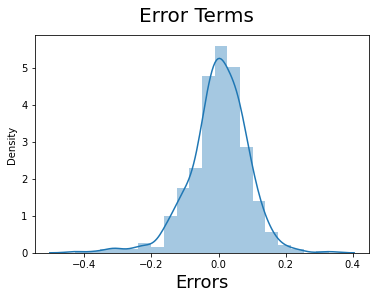

In [100]:
# Plot the histogram of the error terms
#Error Terms are normalized
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

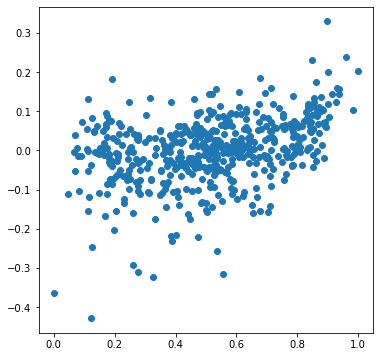

In [101]:
#Plot of y_train versus error terms
#No pattern can be found in the error terms
plt.figure(figsize=[6,6])
plt.scatter(y_train, (y_train - y_train_pred))
plt.show()

## Making Predictions Using the Finalized Model

In [103]:
#Applying MinMax to numeric variables except binary variables
num_vars = ['cnt','windspeed','hum','temp','day']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0.100000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0.633333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0.866667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0.300000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0.033333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [104]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain_thunder,partly_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.500609,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.285836,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.766667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
#Splitting the test dataframe to X_test and y_test 
y_test = df_test.pop('cnt')
X_test = df_test

In [106]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [107]:
X_model_cols

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'january', 'september', 'saturday',
       'light_snow_rain_thunder', 'partly_cloudy', 'august', 'october'],
      dtype='object')

In [108]:
X_test_m15[X_model_cols]

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,january,september,saturday,light_snow_rain_thunder,partly_cloudy,august,october
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,1,1,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0,0.257562,0.708888,0.287411,0,0,0,0,0,0,0,0,0
702,1.0,1,0,1,0.519232,0.756118,0.283397,0,1,0,0,0,0,1,0,0
127,1.0,0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,1,0,0
640,1.0,1,0,1,0.745598,0.817947,0.052115,0,1,0,0,0,0,0,0,1


In [109]:
# Creating X_test_m15 dataframe by only considering variables from X_test_m15
X_test_m15 = X_test_m15[X_model_cols]

In [110]:
# Making predictions using the fourth model
y_pred_m15 = lm17.predict(X_test_m15)

## Model Evaluation

Text(0, 0.5, 'y_pred')

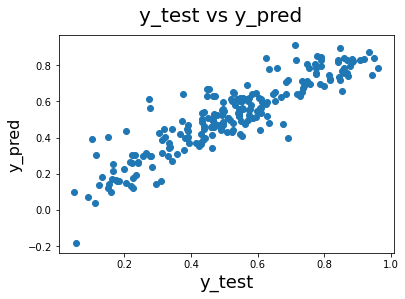

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [112]:
#Finding the RMSE
np.sqrt(mean_squared_error(y_test, y_pred_m15))

0.09441707987444284

In [113]:
#Finding R squared
r_squared = r2_score(y_test, y_pred_m15)
r_squared

0.8123079631825628

In [114]:
#R squared of the train set is similar to the r squared of test set. 
#Hence we can conclude our model provides the best fitted line.
r_squared = r2_score(y_train,y_train_pred)
r_squared

0.8498485770830767

Hence the equation of our best fitted line can be shown as:

$ cnt = 0.1560 + 0.2302  \times  yr - 0.0545  \times  holiday + 0.0448 \times workingday + 0.5033 \times temp - 0.1629 \times hum - 0.1918 \times windspeed + 0.0971 \times summer + 0.1228 \times winter - 0.0407 \times january + 0.1231 \times september + 0.0537 \times saturday - 0.1940 \times light\_snow\_rain\_thunder + 0.0584 \times partly\_cloudy + 0.0541 \times august + 0.0442 \times october $